<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

### Τα απαραίτητα imports

In [2]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

#### Παραγωγή συνθετικών τοπολογιών

Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.

In [4]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

# regural
REG = nx.watts_strogatz_graph(n, d, p=0) 
# random gilbert
RGilG = nx.gnm_random_graph(n, M)
# random erdos renyi
RGER = nx.erdos_renyi_graph(n, p)
# random geometric
RGG = nx.random_geometric_graph(n, radius=R)
# scale free
SF = nx.barabasi_albert_graph(n, d)
# small world
SW = nx.watts_strogatz_graph(n, d, p)

artificial_graphs = [
    {
        'name': 'REG',
        'graph': REG,
    },
    {
        'name': 'RGilbert',
        'graph': RGilG,
    },
    {
        'name': 'RErdos',
        'graph': RGER,
    },
    {
        'name': 'RGG',
        'graph': RGG,
    },
    {
        'name': 'SF',
        'graph': SF,
    },
    {
        'name': 'SW',
        'graph': SW,
    },
]

for g in artificial_graphs:
    name, graph = g.values()
    if not nx.is_connected(graph):
        print(f"Found not connected graph ({name}), replacing it with its largest connected component...")
        cc = max(nx.connected_components(graph), key=len)
        g['graph'] = graph.subgraph(cc).copy()
                

#### Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.

In [5]:
real_graphs = []

#football network
football=nx.read_gml(r"football.gml")
real_graphs.append({
    'name': 'football',
    'graph': football,
})

In [6]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1
        
real_graphs.append({
    'name': 'got',
    'graph': got,
})

##### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

In [15]:
#email-Eu-core network
eu = nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())
self_loops = nx.selfloop_edges(eu)
eu.remove_edges_from(self_loops)
cc = max(nx.connected_components(eu), key=len)
eu = eu.subgraph(cc).copy()

print(eu)
real_graphs.append({
    'name': 'eu',
    'graph': eu,
})

Graph with 986 nodes and 16064 edges


#### Συνολικά άρα έχουμε τους γράφους

In [16]:
print("Artificial graphs:")
print(artificial_graphs)
print("Real graphs:")
print(real_graphs)

all_graphs = artificial_graphs + real_graphs

Artificial graphs:
[{'name': 'REG', 'graph': <networkx.classes.graph.Graph object at 0x7f6ac4b5e7c0>}, {'name': 'RGilbert', 'graph': <networkx.classes.graph.Graph object at 0x7f6ac4b5e760>}, {'name': 'RErdos', 'graph': <networkx.classes.graph.Graph object at 0x7f6ac4461af0>}, {'name': 'RGG', 'graph': <networkx.classes.graph.Graph object at 0x7f6ac4b5e820>}, {'name': 'SF', 'graph': <networkx.classes.graph.Graph object at 0x7f6ac4b5e970>}, {'name': 'SW', 'graph': <networkx.classes.graph.Graph object at 0x7f6ac4b5e8b0>}]
Real graphs:
[{'name': 'football', 'graph': <networkx.classes.graph.Graph object at 0x7f6b0067ea30>}, {'name': 'got', 'graph': <networkx.classes.graph.Graph object at 0x7f6b0067e370>}, {'name': 'eu', 'graph': <networkx.classes.graph.Graph object at 0x7f6ac1619b80>}]


<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

##### Κατανομή βαθμού κόμβου για τους γράφους

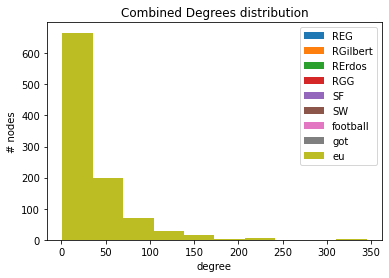

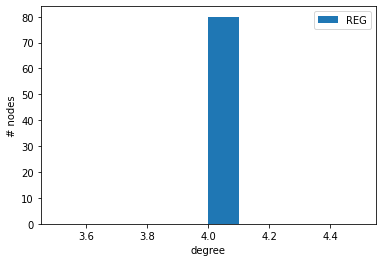

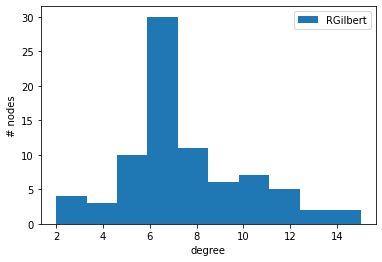

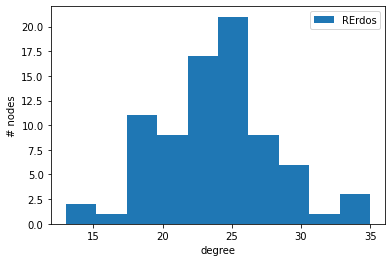

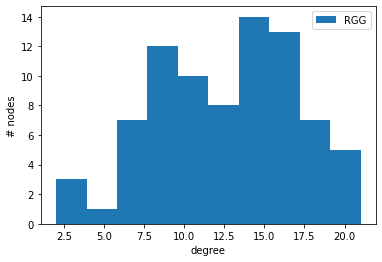

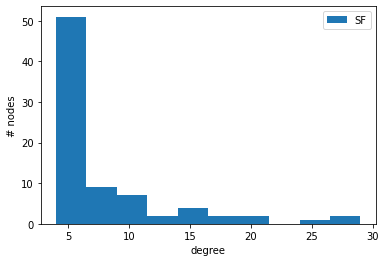

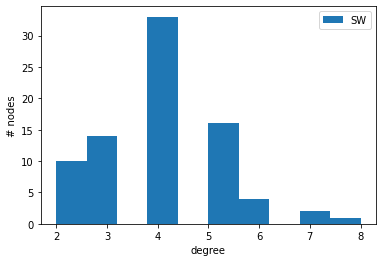

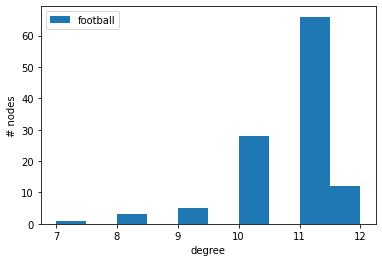

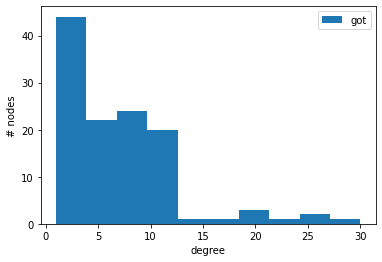

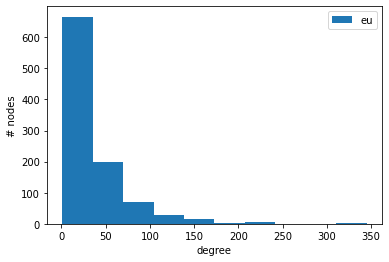

In [17]:
def find_degree(G):
    return G.degree()

plt.figure(1)
plt.title('Combined Degrees distribution')
plt.xlabel('degree')
plt.ylabel('# nodes')

degrees = dict()
# one plot combining all the distributions
for g in all_graphs:
    name, graph = g.values()
    degrees[name] = [deg[1] for deg in find_degree(graph)]
    plt.hist(degrees[name], bins=10)
    
plt.legend([g['name'] for g in all_graphs])

# one seperate plot for each distribution to avoid previous visual overlappings
c = 2
for g in all_graphs:
    name, graph = g.values()
    plt.figure(c)
    plt.xlabel('degree')
    plt.ylabel('# nodes')
    plt.hist(degrees[name], bins=10)
    plt.legend([name])
    c += 1

##### Μέσος βαθμός κάθε τοπολογίας

In [18]:
from statistics import mean
print("graph\t\t| avg degree")
print('---------------------------------------------')
for g in all_graphs:
    name, graph = g.values()
    g_degrees = [deg[1] for deg in find_degree(graph)]
    avg = round(mean(g_degrees), 2)
    print(f"{name}{'       ' if len(name)<7 else ''}\t| {avg}")

graph		| avg degree
---------------------------------------------
REG       	| 4
RGilbert	| 7.5
RErdos       	| 23.6
RGG       	| 12.68
SF       	| 7.6
SW       	| 4
football	| 10.66
got       	| 6.66
eu       	| 32.58


<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

##### Κατανομή συντελεστή ομαδοποίησης κάθε τοπολογίας

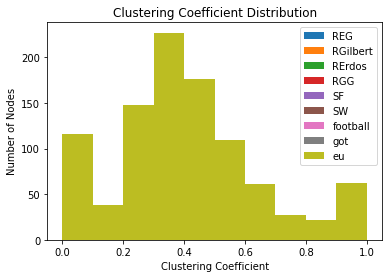

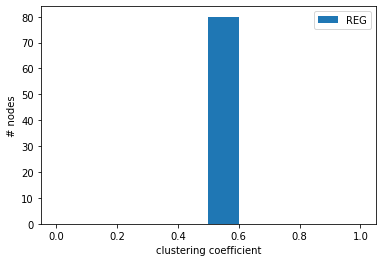

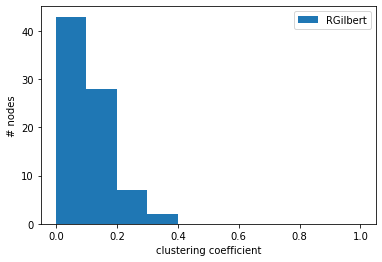

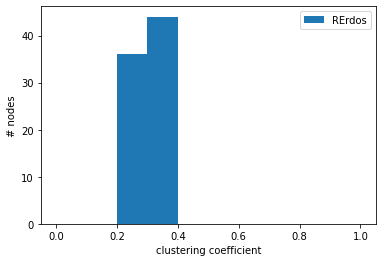

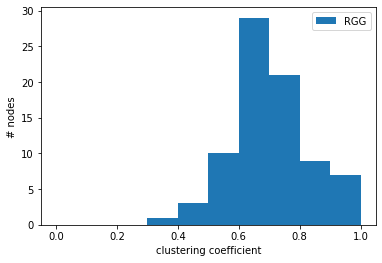

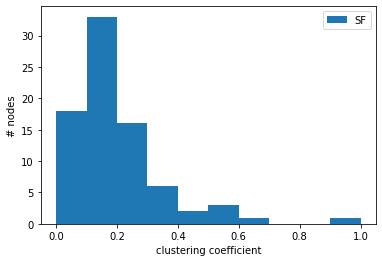

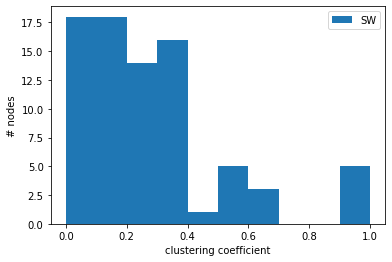

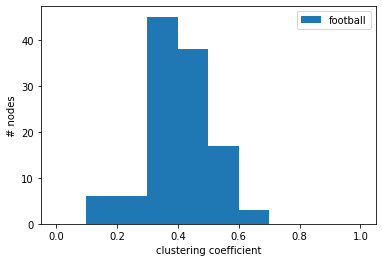

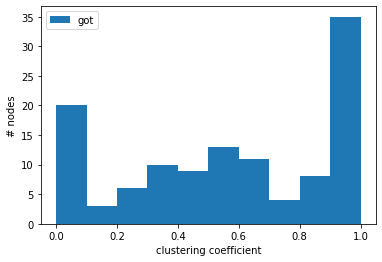

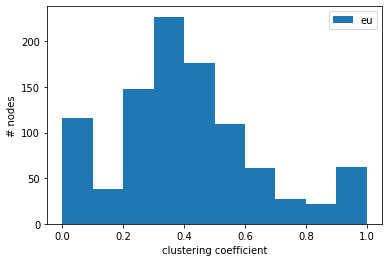

In [19]:
def cc(G):
    '''
    * for the graph G, return a dict with the clustering coefficient of each node
    '''
    d = { key: round(val, 3) for key, val in nx.clustering(G).items() } 
    return d

plt.figure(1)
plt.title("Clustering Coefficient Distribution")
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Nodes')

d = dict()
for g in all_graphs:
    name, graph = g.values()
    d[name] = cc(graph)
    plt.hist(d[name].values(), range=[0.0, 1.0], bins=10)
plt.legend([g['name'] for g in all_graphs])

# one seperate plot for each distribution to avoid previous visual overlappings
c = 2
for g in all_graphs:
    name, graph = g.values()
    plt.figure(c)
    plt.xlabel('clustering coefficient')
    plt.ylabel('# nodes')
    plt.hist(d[name].values(), range=[0.0, 1.0], bins=10)
    plt.legend([name])
    c += 1

##### Μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας

In [20]:
def cc_graph(G):
    '''
    * for the graph G, return the mean value of the clustering coefficients of its nodes
    '''
    d = cc(G)
    return round(mean(d.values()), 3)

print("Graph\t\t| mean clustering coefficient")
print('--------------------------')
for g in all_graphs:
    avg = cc_graph(g['graph'])
    print(f"{g['name']}{'       ' if len(name)<7 else ''}\t| {avg}")
    

Graph		| mean clustering coefficient
--------------------------
REG       	| 0.5
RGilbert       	| 0.108
RErdos       	| 0.302
RGG       	| 0.702
SF       	| 0.186
SW       	| 0.273
football       	| 0.403
got       	| 0.574
eu       	| 0.407


<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

##### Κατανομή κεντρικότητας εγγύτητας για κάθε τοπολογία

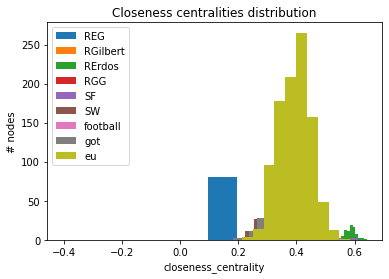

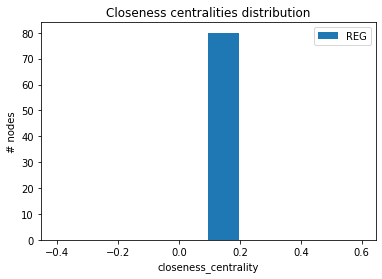

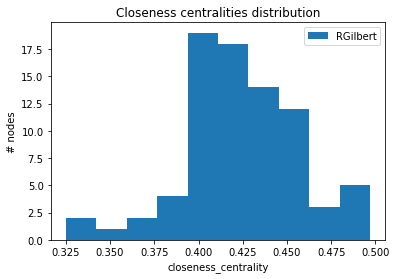

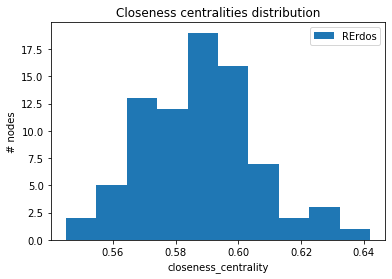

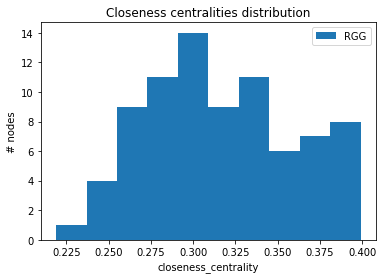

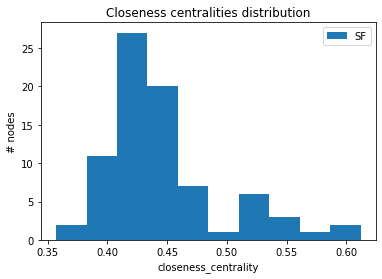

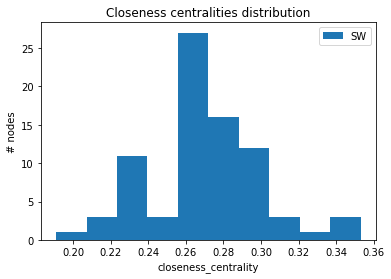

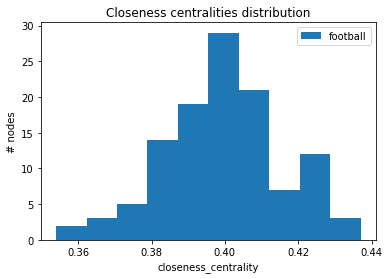

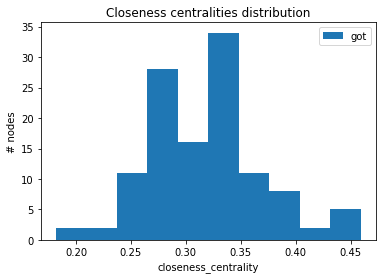

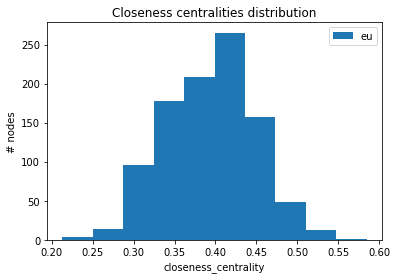

In [21]:
def find_closeness(G):
    return nx.closeness_centrality(G)

# one plot combining all the distributions
plt.figure(1)
plt.title('Closeness centralities distribution')
plt.xlabel('closeness_centrality')
plt.ylabel('# nodes')

centralities = dict()
for g in all_graphs:
    name, graph = g.values()
    centralities[name] = list(map(lambda x: round(x, 3), find_closeness(graph).values()))
    plt.hist(centralities[name], bins=10)
plt.legend([g['name'] for g in all_graphs])
    
# one seperate plot for each distribution to avoid previous visual overlappings
c = 2
for g in all_graphs:
    plt.figure(c)
    plt.title('Closeness centralities distribution')
    plt.xlabel('closeness_centrality')
    plt.ylabel('# nodes')
    name, graph = g.values()
    plt.hist(centralities[name], bins=10)
    plt.legend([name])
    c += 1

##### Μέση κεντρικότητα εγγύτητας για κάθε τοπολογία

In [22]:
print("graph\t\t| avg closeness centrality")
print('---------------------------------------')

for g in all_graphs:
    name, graph = g.values()
    centr = centralities[name]
    avg = round(mean(centr), 2)
    print(f"{name}{'       ' if len(name)<7 else ''}\t| {avg}")

graph		| avg closeness centrality
---------------------------------------
REG       	| 0.1
RGilbert	| 0.42
RErdos       	| 0.59
RGG       	| 0.32
SF       	| 0.45
SW       	| 0.27
football	| 0.4
got       	| 0.32
eu       	| 0.39


#### Συμπεράσματα

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [23]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [24]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

##### Παράγω τις διαμερίσεις

In [ ]:
for g in all_graphs[:-1]:
    name, graph = g.values()
    print(f"{name}:")
    graph, mapping = conv2int(graph, 0)
    partitions = nx.community.girvan_newman(graph)
    for community in partitions:
        if len(community)>50:
            break
        print("Communitites:", len(community))
        #for part in partition:
        #    print(part)
        #    summ += len(part)
        #print(summ)
        #print('-------')

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

#### Οπτικοποίηση κοινοτήτων American College Football

#### Οπτικοποίηση κοινοτήτων Game of Thrones

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

#### Οπτικοποίηση κοινοτήτων REG

#### Οπτικοποίηση κοινοτήτων RGER

#### Οπτικοποίηση κοινοτήτων RGG

#### Οπτικοποίηση κοινοτήτων SW

#### Οπτικοποίηση κοινοτήτων SF